In [129]:
#imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import os


#Feel free to delete these if you don't want to install them all right away
import xgboost as xgb
from catboost import CatBoostClassifier
#Used sm and smf instead to get these, but can still use them if needed, but sm has better summary() function
from sklearn.linear_model import LinearRegression, LogisticRegression, TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import poisson, binom, norm
from scipy.stats import chisquare
import statsmodels.api as sm
import statsmodels.formula.api as smf



from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import scipy.stats as st



#Change this to whereever you save your stuff
os.chdir("C:\ASNA_Case_Comp")


<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\1835299192.py:36: SyntaxWarning: invalid escape sequence '\A'
  os.chdir("C:\ASNA_Case_Comp")


In [130]:
#Read in dataset
dat = pd.read_excel("Dataset.xlsx")
dat_one_hot = pd.read_csv("cleanData.csv",header=0)

#Add a column for has claim
dat['has_claim'] = dat['claim_id'].apply(lambda x: 1 if x !=0 else 0)
dat_one_hot['has_claim'] = dat_one_hot['claim_id'].apply(lambda x: 1 if x !=0 else 0)

count = 0
for row in dat_one_hot['has_claim']:
    if row > 0:
        count+=1
print(count)
#There is this many total claims out of 10000 students

1819


# Reading in Aidan's data segmented by coverage type

In [131]:
dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",header=0)
dat_expense['has_claim'] = dat_expense['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability = pd.read_csv("CleanByCoverage\CleanByCoverage\liabilityClean.csv",header=0)
dat_liability['has_claim'] = dat_liability['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical = pd.read_csv("CleanByCoverage\CleanByCoverage\medicalClean.csv",header=0)
dat_medical['has_claim'] = dat_medical['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property = pd.read_csv("CleanByCoverage\CleanByCoverage\propertyClean.csv",header=0)
dat_property['has_claim'] = dat_property['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_expense_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\expense.csv",header=0)
dat_expense_original['has_claim'] = dat_expense_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\liability.csv",header=0)
dat_liability_original['has_claim'] = dat_liability_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\medical.csv",header=0)
dat_medical_original['has_claim'] = dat_medical_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\property.csv",header=0)
dat_property_original['has_claim'] = dat_property_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\766309216.py:1: SyntaxWarning: invalid escape sequence '\C'
  dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",h

# Calculating Claim Frequency

In [132]:
print('Frequency for Additional Expense Coverage')
claim_frequency_expense = list(zip(dat_expense_original['has_claim'], dat_expense_original['risk_tier']))
claim_frequency_expense_counts = Counter(claim_frequency_expense)
for item, count in claim_frequency_expense_counts.items():
    print(f'{item}: {count}')

print('Frequency for Liability Coverage')
claim_frequency_liability = list(zip(dat_liability_original['has_claim'], dat_liability_original['risk_tier']))
claim_frequency_liability_counts = Counter(claim_frequency_liability)
for item, count in claim_frequency_liability_counts.items():
    print(f'{item}: {count}')

print('Frequency for Medical Coverage')
claim_frequency_medical = list(zip(dat_medical_original['has_claim'], dat_medical_original['risk_tier']))
claim_frequency_medical_counts = Counter(claim_frequency_medical)
for item, count in claim_frequency_medical_counts.items():
    print(f'{item}: {count}')

print('Frequency for Property Coverage')
claim_frequency_property = list(zip(dat_property_original['has_claim'], dat_property_original['risk_tier']))
claim_frequency_property_counts = Counter(claim_frequency_property)
for item, count in claim_frequency_property_counts.items():
    print(f'{item}: {count}')

Frequency for Additional Expense Coverage
(0, 2): 2100
(0, 3): 3124
(0, 1): 4264
(1, 2): 111
(1, 1): 255
(1, 3): 162
Frequency for Liability Coverage
(0, 2): 2190
(0, 3): 3251
(0, 1): 4474
(1, 3): 28
(1, 2): 19
(1, 1): 38
Frequency for Medical Coverage
(0, 2): 2154
(0, 3): 3209
(0, 1): 4408
(1, 3): 72
(1, 2): 55
(1, 1): 106
Frequency for Property Coverage
(0, 2): 1999
(0, 3): 3011
(0, 1): 4068
(1, 1): 470
(1, 3): 281
(1, 2): 222


# Modelling Claim Severity

In [133]:
total_loss_expense = dat_expense['amount'].sum()
print(f"Total Expense Loss: {total_loss_expense:,.2f}")

total_claims_expense = dat_expense['has_claim'].sum()
print(f"Total Expense Claims: {total_claims_expense}")

severity_expense = total_loss_expense / total_claims_expense
print(f"Expense Severity (Loss per Claim): {severity_expense:,.2f}")

total_loss_property = dat_property['amount'].sum()
print(f"Total Property Loss: {total_loss_property:,.2f}")

total_claims_property = dat_property['has_claim'].sum()
print(f"Total Property Claims: {total_claims_property}")

severity_property = total_loss_property / total_claims_property
print(f"Property Severity (Loss per Claim): {severity_property:,.2f}")

total_loss_medical = dat_medical['amount'].sum()
print(f"Total Medical Loss: {total_loss_medical:,.2f}")

total_claims_medical = dat_medical['has_claim'].sum()
print(f"Total Medical Claims: {total_claims_medical}")

severity_medical = total_loss_medical / total_claims_medical
print(f"Medical Severity (Loss per Claim): {severity_medical:,.2f}")

total_loss_liability = dat_liability['amount'].sum()
print(f"Total Liability Loss: {total_loss_liability:,.2f}")

total_claims_liability = dat_liability['has_claim'].sum()
print(f"Total Liability Claims: {total_claims_liability}")

severity_liability = total_loss_liability / total_claims_liability
print(f"Liability Severity (Loss per Claim): {severity_liability:,.2f}")




Total Expense Loss: 2,911,317.09
Total Expense Claims: 528
Expense Severity (Loss per Claim): 5,513.86
Total Property Loss: 995,460.03
Total Property Claims: 973
Property Severity (Loss per Claim): 1,023.08
Total Medical Loss: 3,870,552.10
Total Medical Claims: 233
Medical Severity (Loss per Claim): 16,611.81
Total Liability Loss: 737,410.81
Total Liability Claims: 85
Liability Severity (Loss per Claim): 8,675.42


In [134]:
#Distance grouping function
range_vals = [0,5,30]
def distance_grouper(row,distance_range):
    if row == range_vals[0]:
        return 0
    elif row < range_vals[1]:
        return 1
    else: # Greater than range 2 but within range 3 but in this case is just the max range
        return 2

#Apply this to medical dataset
dat_medical['distance_group'] = dat_medical['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_expense['distance_group'] = dat_expense['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_liability['distance_group'] = dat_liability['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_property['distance_group'] = dat_property['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_one_hot['distance_group'] = dat_one_hot['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))

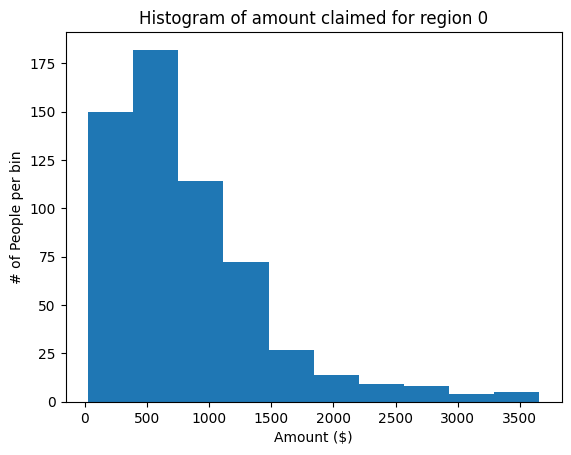

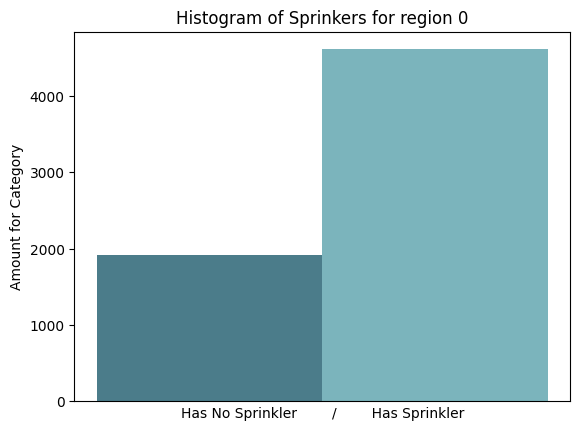

4611 have sprinklers in region 0 and 1917 do not.
Giving us a ratio of 2.41:1 for sprinkler to no sprinkler for region 0


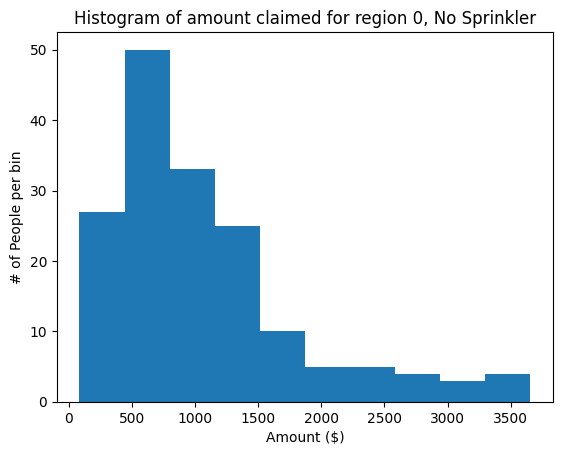

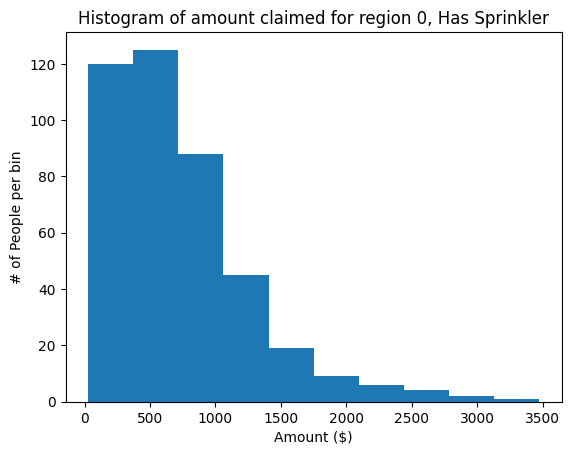

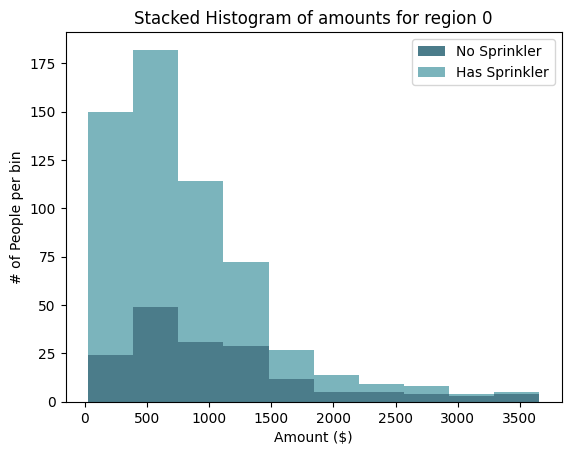

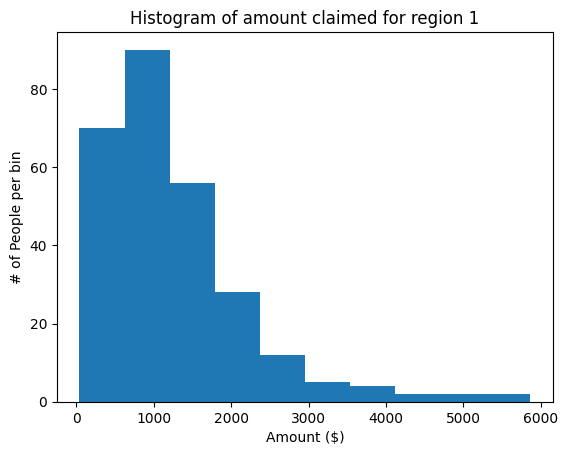

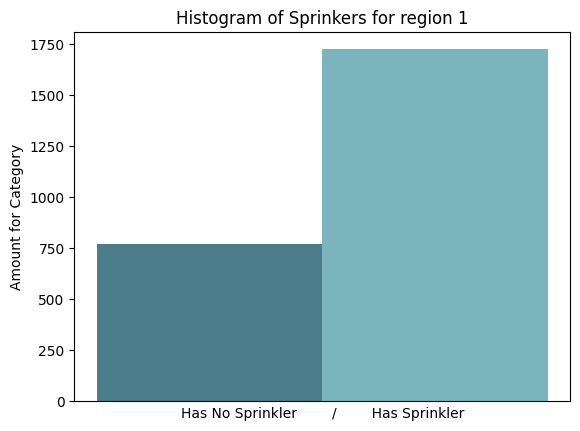

1723 have sprinklers in region 1 and 769 do not.
Giving us a ratio of 2.24:1 for sprinkler to no sprinkler for region 1


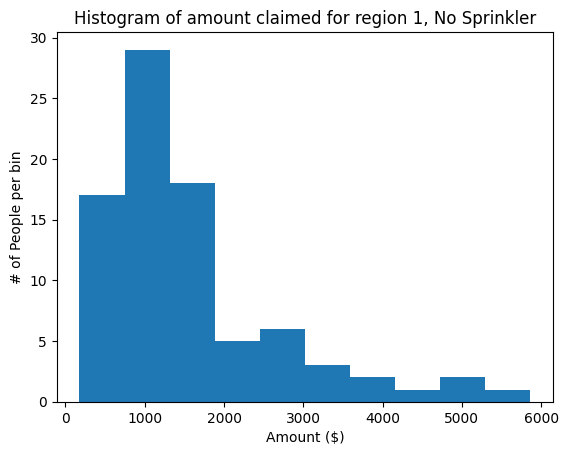

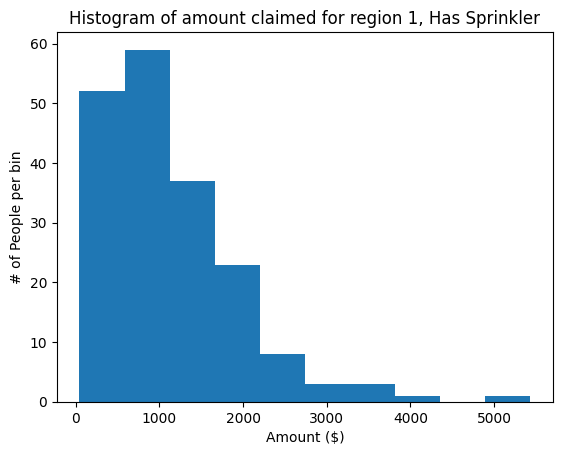

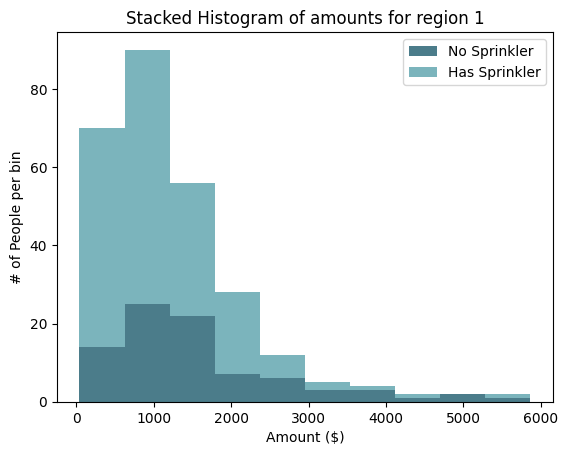

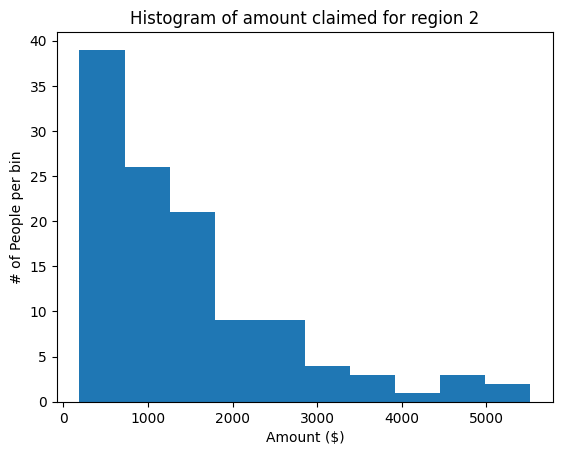

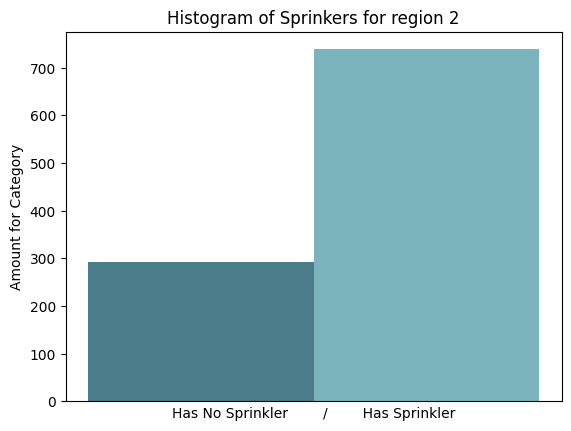

738 have sprinklers in region 2 and 293 do not.
Giving us a ratio of 2.52:1 for sprinkler to no sprinkler for region 2


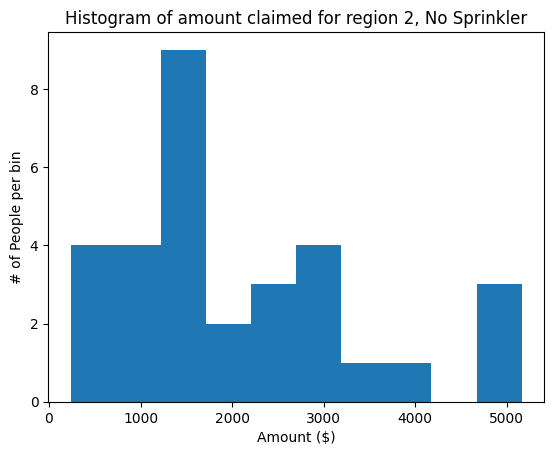

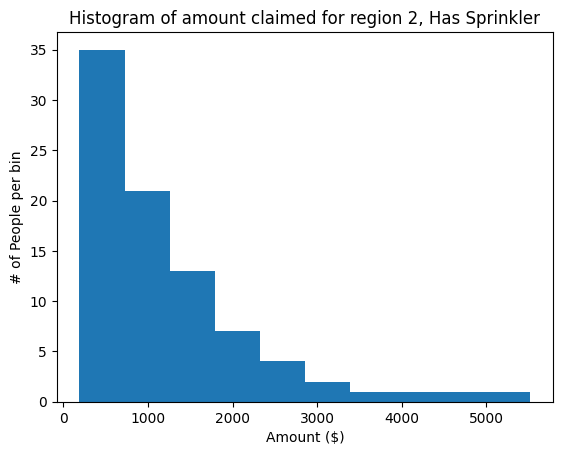

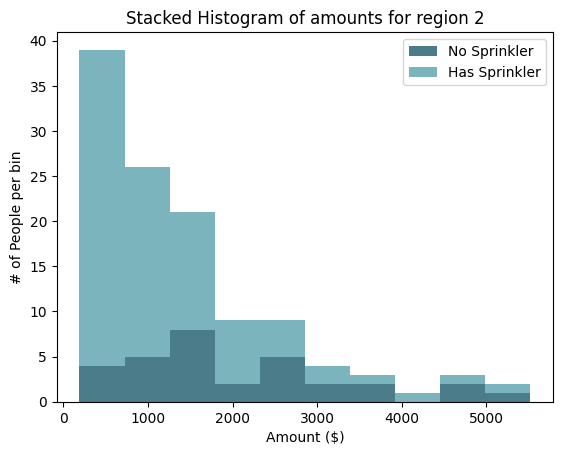

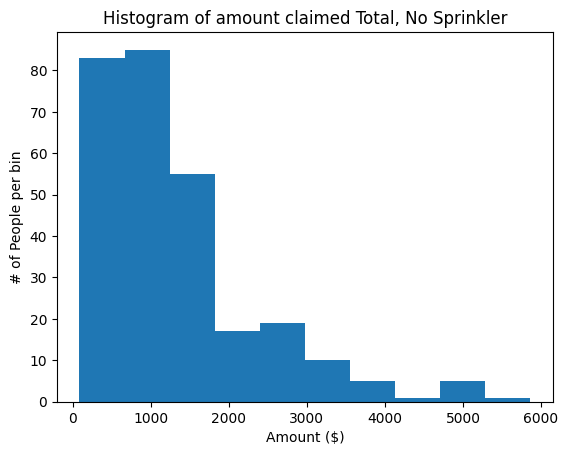

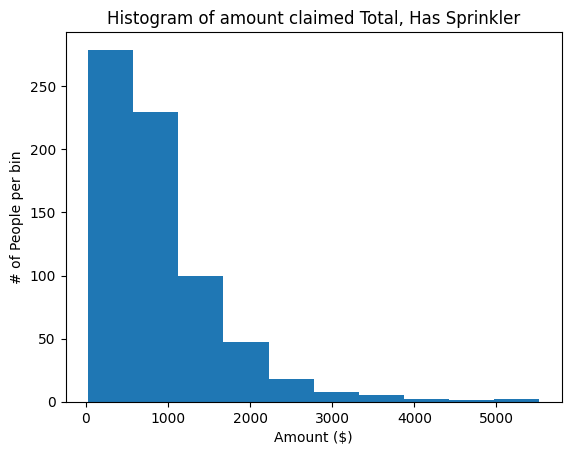

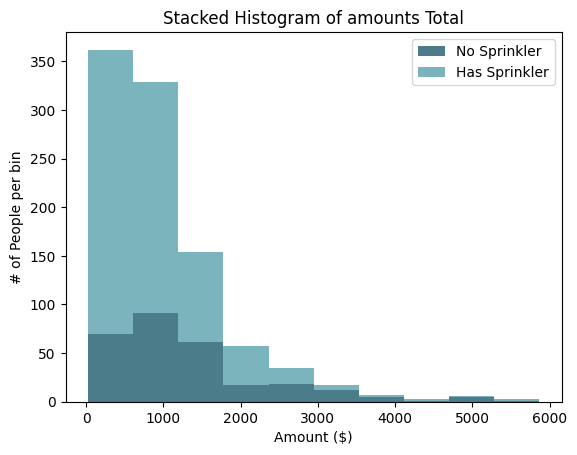

# of people with no sprinkler: 2979
Mean claim (no sprinkler): 124.47

# of people with sprinkler: 7072
Mean claim (has sprinkler): 88.33

Mean claim for region 0: 827.53
All claims in region 0: 585.0
Mean claim for region 1: 1268.63
All claims in region 1: 271.0
Mean claim for region 2: 1432.10
All claims in region 2: 117.0
Frequency: 0.09432695535414569
Severity: 1339.7345626930774
Expected Loss: 126.37308228155581
Frequency (sprinkler): 0.09785067873303167
Severity (sprinkler): 919.9345812551616
Expected Loss (sprinkler): 90.01622316580483


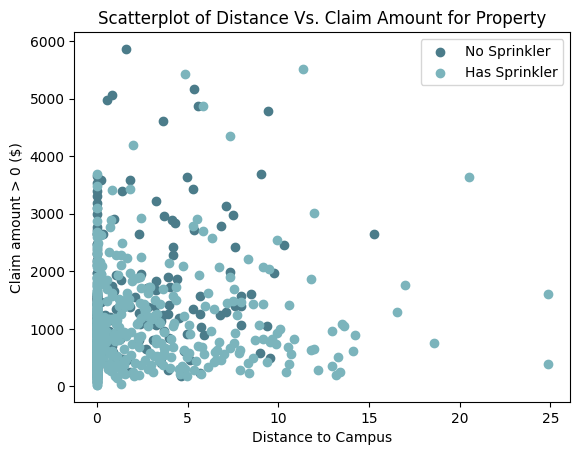

C:\Users\graha\AppData\Local\Temp\ipykernel_21996\1043071135.py:197: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


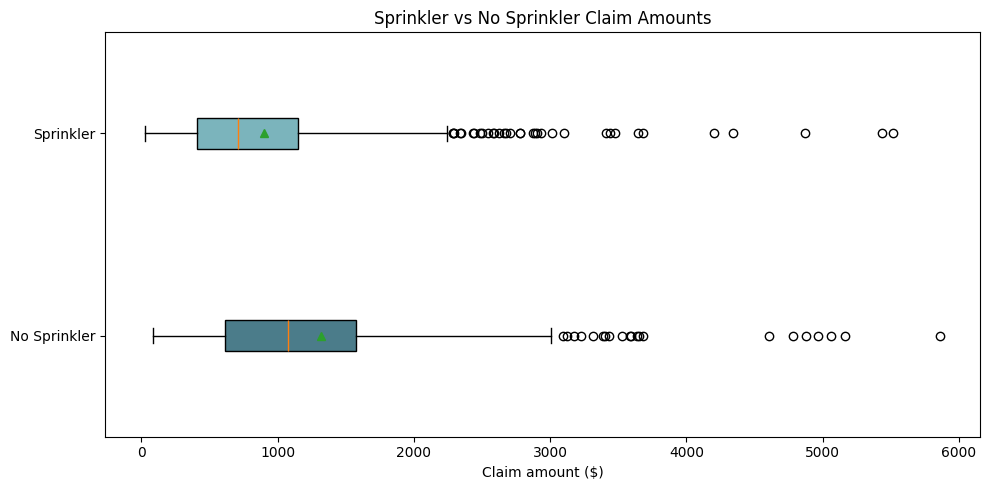

In [157]:
#Now look at pml of the regions
g_c = ["#A4B2B7", "#9DAFB6", "#7BB4BC", "#4B7C8A", "#657A7C"]

def analyze_region(dat):


    mean_claims = [0,0,0]
    claims_per_region = [0,0,0]
    unique_ranges = dat['distance_group'].unique()

    for range_distance in unique_ranges:

        #First plot each region for amount
        regional_points = dat[dat['distance_group'] == range_distance]
        regional_points_no0 = regional_points[regional_points['amount'] > 0]
        
        
        #Plot the region
        plt.hist(regional_points_no0['amount'], bins=10)
        plt.xlabel("Amount ($)")
        plt.ylabel("# of People per bin")
        plt.title(f"Histogram of amount claimed for region {range_distance}")
        plt.show()

        #Now plot by how many people have sprinklers
        n, bins, patches = plt.hist(regional_points['sprinklered'], bins=2)

        colors = [g_c[3], g_c[2]]
        for patch, color in zip(patches, colors):
            patch.set_facecolor(color)
        plt.xlabel("Has No Sprinkler        /        Has Sprinkler")
        plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        plt.ylabel("Amount for Category")
        plt.title(f"Histogram of Sprinkers for region {range_distance}")
        plt.show()
        print(f"{regional_points['sprinklered'].sum()} have sprinklers in region {range_distance} and {len(regional_points) - regional_points['sprinklered'].sum()} do not.")
        print(f"Giving us a ratio of {regional_points['sprinklered'].sum()/(len(regional_points) - regional_points['sprinklered'].sum()):.2f}:1 for sprinkler to no sprinkler for region {range_distance}")

        #Look at claim amounts for sprinkler vs no sprinkler by region
        
        #First no sprinkler
        no_sprinkler = regional_points_no0[regional_points_no0['sprinklered'] == 0]
        sprinkler = regional_points_no0[regional_points_no0['sprinklered'] == 1]

        plt.hist(no_sprinkler['amount'], bins=10)
        plt.xlabel("Amount ($)")
        plt.ylabel("# of People per bin")
        plt.title(f"Histogram of amount claimed for region {range_distance}, No Sprinkler")
        plt.show()

        plt.hist(sprinkler['amount'], bins=10)
        plt.xlabel("Amount ($)")
        plt.ylabel("# of People per bin")
        plt.title(f"Histogram of amount claimed for region {range_distance}, Has Sprinkler")
        plt.show()

        plt.hist(
            [no_sprinkler['amount'], sprinkler['amount']],
            bins=10,
            stacked=True,
            color=[g_c[3], g_c[2]],
            label=["No Sprinkler", "Has Sprinkler"]
        )

        plt.xlabel("Amount ($)")
        plt.ylabel("# of People per bin")
        plt.title(f"Stacked Histogram of amounts for region {range_distance}")
        plt.legend()
        plt.show()



        #Finding means and amounts for claims by region
        for _, row in dat.iterrows():
            if row['distance_group'] == range_distance:
                mean_claims[range_distance] += row['amount']
                claims_per_region[range_distance] += row['has_claim']

    #For all regions together
    #First no sprinkler
    dat_amount = dat[dat['amount']>0]
    no_sprinkler = dat_amount[dat_amount['sprinklered'] == 0]
    sprinkler = dat_amount[dat_amount['sprinklered'] == 1]

    plt.hist(no_sprinkler['amount'], bins=10)
    plt.xlabel("Amount ($)")
    plt.ylabel("# of People per bin")
    plt.title(f"Histogram of amount claimed Total, No Sprinkler")
    plt.show()

    plt.hist(sprinkler['amount'], bins=10)
    plt.xlabel("Amount ($)")
    plt.ylabel("# of People per bin")
    plt.title(f"Histogram of amount claimed Total, Has Sprinkler")
    plt.show()

    plt.hist(
        [no_sprinkler['amount'], sprinkler['amount']],
        bins=10,
        stacked=True,
        color=[g_c[3], g_c[2]],
        label=["No Sprinkler", "Has Sprinkler"]
    )

    plt.xlabel("Amount ($)")
    plt.ylabel("# of People per bin")
    plt.title(f"Stacked Histogram of amounts Total")
    plt.legend()
    plt.show()

    sprinkler_count = (dat['sprinklered'] == 1).sum()
    no_sprinkler_count = (dat['sprinklered'] == 0).sum()
    # Mean claim amount by sprinkler status
    mean_has_sprinkler = dat.loc[dat['sprinklered'] == 1, 'amount'].mean()
    mean_no_sprinkler = dat.loc[dat['sprinklered'] == 0, 'amount'].mean()

    print(f"# of people with no sprinkler: {no_sprinkler_count}")
    print(f"Mean claim (no sprinkler): {mean_no_sprinkler:.2f}\n")

    print(f"# of people with sprinkler: {sprinkler_count}")
    print(f"Mean claim (has sprinkler): {mean_has_sprinkler:.2f}\n")

    #Get mean and display results
    for range_u, mean_claim, claim_in_region in zip(unique_ranges, mean_claims, claims_per_region):
        mean_claim = mean_claim / claim_in_region
        print(f'Mean claim for region {range_u}: {mean_claim:.2f}')
        print(f'All claims in region {range_u}: {claim_in_region}')


    #Get fitted lognorm values
    no_sprinkler_all = dat[dat['sprinklered'] == 0]
    
    sigma_no_sprinkler, loc_no_sprinkler, scale_no_sprinkler = st.lognorm.fit(no_sprinkler['amount'], floc=0)
    mu_no_sprinkler = np.log(scale_no_sprinkler)
    #PML for no sprinkler vs sprinkler
    P_claim_no_sprinkler = no_sprinkler_all['has_claim'].sum() / len(no_sprinkler_all['has_claim'])

    #Formula for expected value of lognormal
    severity_no_sprinkler = np.exp(mu_no_sprinkler + 0.5 * sigma_no_sprinkler**2)

    #Expected loss (probability * expected value under lognormal of loss)
    expected_loss = P_claim_no_sprinkler * severity_no_sprinkler

    print("Frequency:", P_claim_no_sprinkler)
    print("Severity:", severity_no_sprinkler)
    print("Expected Loss:", expected_loss)

    sprinkler_all = dat[dat['sprinklered'] == 1]
    # Fit lognormal for HAS SPRINKLER group (positive amounts only)
    sigma_sprinkler, loc_sprinkler, scale_sprinkler = st.lognorm.fit(
        sprinkler['amount'], 
        floc=0
    )
    mu_sprinkler = np.log(scale_sprinkler)

    # Claim frequency for those WITH sprinklers
    P_claim_sprinkler = sprinkler_all['has_claim'].sum() / len(sprinkler_all['has_claim'])
   

    # Lognormal severity (mean)
    severity_sprinkler = np.exp(mu_sprinkler + 0.5 * sigma_sprinkler**2)

    # Expected loss
    expected_loss_sprinkler = P_claim_sprinkler * severity_sprinkler

    print("Frequency (sprinkler):", P_claim_sprinkler)
    print("Severity (sprinkler):", severity_sprinkler)
    print("Expected Loss (sprinkler):", expected_loss_sprinkler)

    #Scatterplot
    plt.scatter(
    no_sprinkler['distance_to_campus'],
    no_sprinkler['amount'],
    color=g_c[3],
    label="No Sprinkler"
    )

    plt.scatter(
        sprinkler['distance_to_campus'],
        sprinkler['amount'],
        color=g_c[2],
        label="Has Sprinkler"
    )

    plt.xlabel("Distance to Campus")
    plt.ylabel("Claim amount > 0 ($)")
    plt.title("Scatterplot of Distance Vs. Claim Amount for Property")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10, 5))


    # Box colors (one per dataset)
    box_colors = [g_c[3], g_c[2]]

    # Create boxplot
    bp = plt.boxplot(
        [no_sprinkler['amount'], sprinkler['amount']],
        vert=False,
        labels=["No Sprinkler", "Sprinkler"],
        showmeans=True,
        meanline=False,
        meanprops=dict(color="black", linewidth=1),
        patch_artist=True
    )

    # Apply colors to boxes
    for patch, color in zip(bp["boxes"], box_colors):
        patch.set_facecolor(color)

    plt.xlabel("Claim amount ($)")
    plt.title("Sprinkler vs No Sprinkler Claim Amounts")
    plt.tight_layout()
    plt.show()


    return mean_claims, claims_per_region

mean_regional_claims_medical, claims_per_region_medical = analyze_region(dat_property)


        


Severity for Additional Living Expense Coverage by Risk Tier
Risk Tier 1: 4,533.37
Risk Tier 2: 5,732.04
Risk Tier 3: 6,907.72

Severity for Property Coverage by Risk Tier
Risk Tier 1: 914.25
Risk Tier 2: 1,051.27
Risk Tier 3: 1,182.85

Severity for Medical Coverage by Risk Tier
Risk Tier 1: 14,379.40
Risk Tier 2: 17,255.91
Risk Tier 3: 19,406.40

Severity for Liability Coverage by Risk Tier
Risk Tier 1: 8,938.80
Risk Tier 2: 7,080.32
Risk Tier 3: 9,400.37



C:\Users\graha\AppData\Local\Temp\ipykernel_21996\1200269035.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\1200269035.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\1200269035.py:9: FutureWarning: DataFrameGro

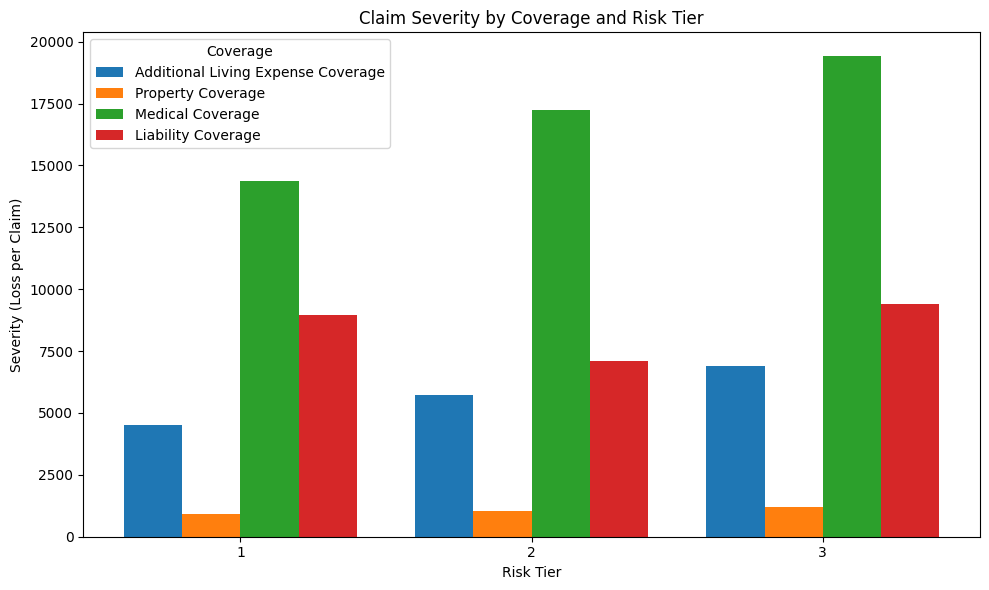

In [136]:

def print_and_plot_severity_by_tier(datasets):
    """
    datasets: dict of {coverage_name: dataframe}
    """
    severity_data = {}

    for coverage_name, df in datasets.items():
        print(f"Severity for {coverage_name} by Risk Tier")
        severity_by_tier = df.groupby('risk_tier').apply(
            lambda x: x['amount'].sum() / x['has_claim'].sum() if x['has_claim'].sum() > 0 else 0
        ).sort_index()
        severity_data[coverage_name] = severity_by_tier  

        for tier, sev in severity_by_tier.items():
            print(f"Risk Tier {tier}: {sev:,.2f}")
        print() 

    severity_df = pd.DataFrame(severity_data).fillna(0)
    risk_tiers = severity_df.index.tolist()
    x = np.arange(len(risk_tiers))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10,6))
    for i, cov in enumerate(severity_df.columns):
        ax.bar(x + i*width, severity_df[cov].values, width=width, label=cov)

    ax.set_xlabel("Risk Tier")
    ax.set_ylabel("Severity (Loss per Claim)")
    ax.set_title("Claim Severity by Coverage and Risk Tier")
    ax.set_xticks(x + width*1.5)  # center the x-axis labels
    ax.set_xticklabels(risk_tiers)
    ax.legend(title="Coverage")

    plt.tight_layout()
    plt.show()


# Example usage
datasets = {
    "Additional Living Expense Coverage": dat_expense_original,
    "Property Coverage": dat_property_original,
    "Medical Coverage": dat_medical_original,
    "Liability Coverage": dat_liability_original
}

print_and_plot_severity_by_tier(datasets)

Severity for Additional Living Expense Coverage by Risk Tier
Risk Tier 1: 255.81
Risk Tier 2: 287.77
Risk Tier 3: 340.55

Severity for Property Coverage by Risk Tier
Risk Tier 1: 94.69
Risk Tier 2: 105.08
Risk Tier 3: 100.97

Severity for Medical Coverage by Risk Tier
Risk Tier 1: 337.66
Risk Tier 2: 429.64
Risk Tier 3: 425.86

Severity for Liability Coverage by Risk Tier
Risk Tier 1: 75.28
Risk Tier 2: 60.90
Risk Tier 3: 80.27



C:\Users\graha\AppData\Local\Temp\ipykernel_21996\2670582953.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\2670582953.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_21996\2670582953.py:9: FutureWarning: DataFrameGro

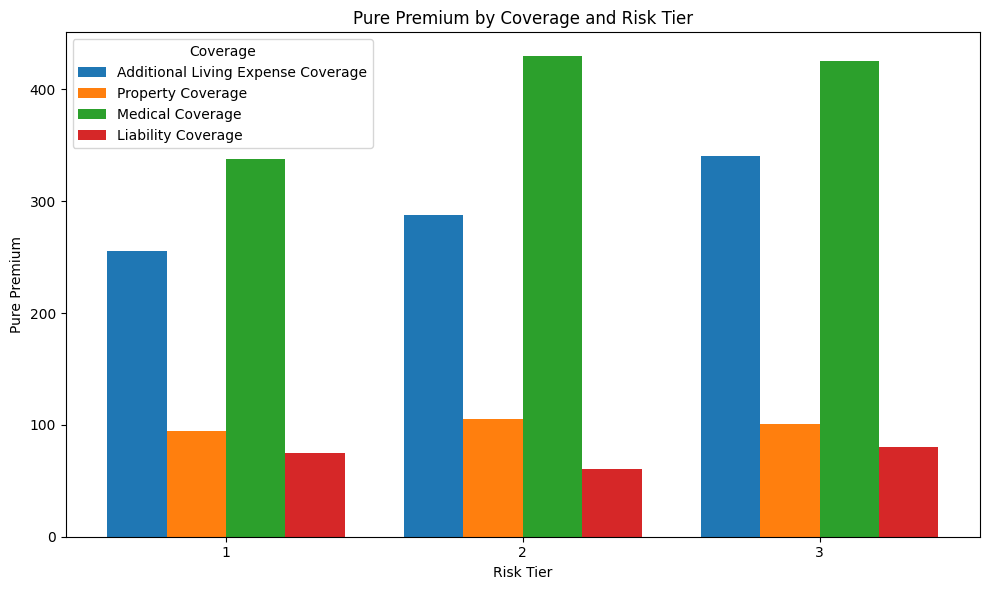

In [137]:

def print_and_plot_pure_premium_by_tier(datasets):
    """
    datasets: dict of {coverage_name: dataframe}
    """
    severity_data = {}

    for coverage_name, df in datasets.items():
        print(f"Severity for {coverage_name} by Risk Tier")
        severity_by_tier = df.groupby('risk_tier').apply(
            lambda x: x['amount'].sum() / len(x['has_claim'])
        ).sort_index()
        severity_data[coverage_name] = severity_by_tier  

        for tier, sev in severity_by_tier.items():
            print(f"Risk Tier {tier}: {sev:,.2f}")
        print() 

    severity_df = pd.DataFrame(severity_data).fillna(0)
    risk_tiers = severity_df.index.tolist()
    x = np.arange(len(risk_tiers))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10,6))
    for i, cov in enumerate(severity_df.columns):
        ax.bar(x + i*width, severity_df[cov].values, width=width, label=cov)

    ax.set_xlabel("Risk Tier")
    ax.set_ylabel("Pure Premium")
    ax.set_title("Pure Premium by Coverage and Risk Tier")
    ax.set_xticks(x + width*1.5)  # center the x-axis labels
    ax.set_xticklabels(risk_tiers)
    ax.legend(title="Coverage")

    plt.tight_layout()
    plt.show()

print_and_plot_pure_premium_by_tier(datasets)

# Proving that sections of people in the code follow distributions

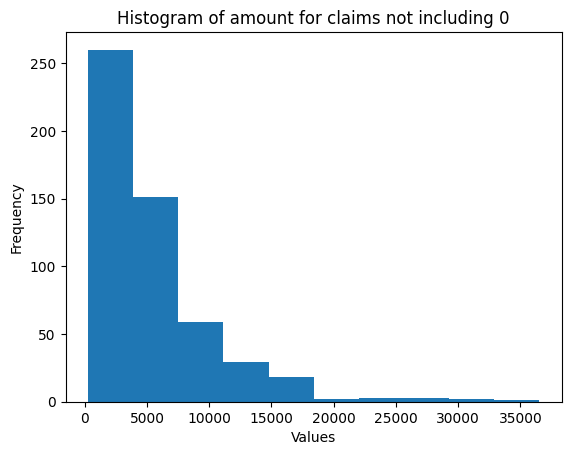

0.003440367263178311


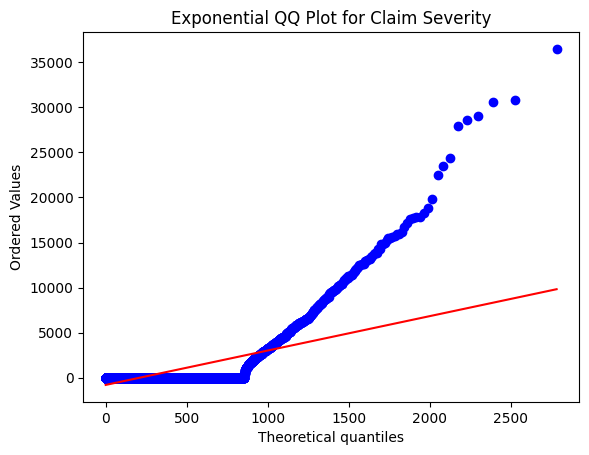

C:\Users\graha\AppData\Local\Temp\ipykernel_21996\2899948280.py:25: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(y))


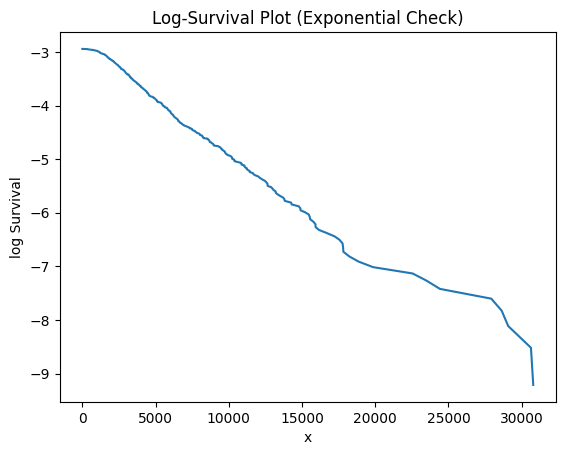

AndersonResult(statistic=inf, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=290.6666421061602)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [138]:
# This is in accordance with helping to calculate basic metrics, that will also lead us to help develop a framework for stress testing, PML, etc.

#Lets group claim amount by risk tier to find E[Loss] per risk tier
#Want to hopefully show each region follows some distribution, first will make histograms

vals0 = dat_expense.loc[dat_expense['amount'] != 0, 'amount']
plt.hist(vals0, bins=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of amount for claims not including 0")
plt.show()

#Performing a goodness of fit test using QQ-plots
vals = dat_expense['amount']
lam = 1 / vals.mean()
print(lam)

st.probplot(vals, dist="expon", sparams=(0, 1/lam), plot=plt)
plt.title("Exponential QQ Plot for Claim Severity")
plt.show()

ecdf = sm.distributions.ECDF(vals)
x = np.sort(vals)
y = 1 - ecdf(x)
plt.plot(x, np.log(y))
plt.xlabel("x")
plt.ylabel("log Survival")
plt.title("Log-Survival Plot (Exponential Check)")
plt.show()



st.kstest(vals, 'expon', args=(0, 1/lam))
st.anderson(vals, dist='expon')



The above results demonstrate that claims do not follow an exponential, as the tail is heavier

Estimated μ = 8.300180851162567
Estimated σ = 0.8027279188635833


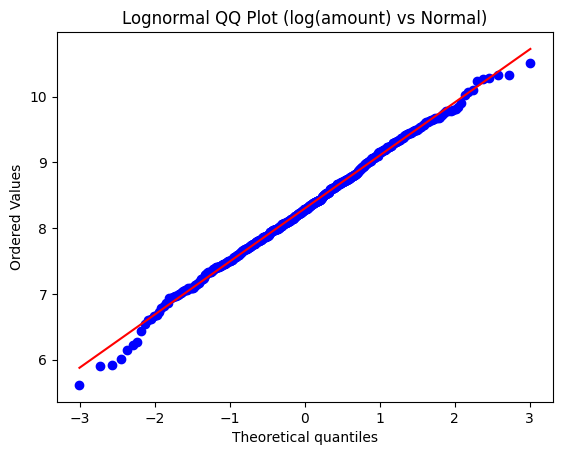

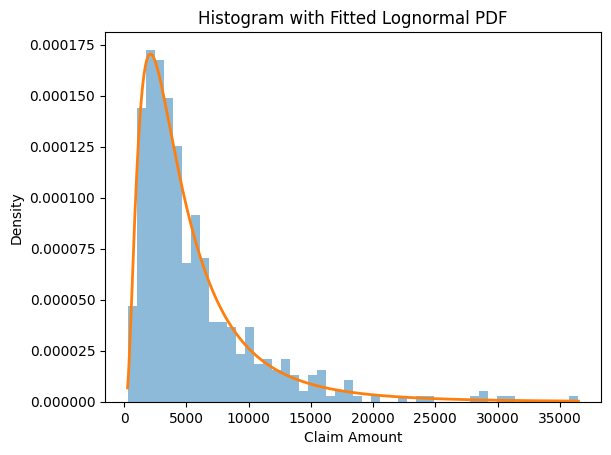

C:\Users\graha\AppData\Local\Temp\ipykernel_21996\3225569778.py:41: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


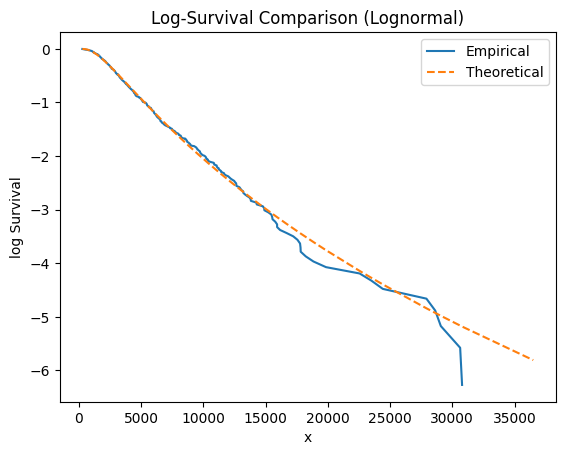

KS statistic: 0.018643939466284398
p-value: 0.9914187403159496
AndersonResult(statistic=0.22611609085220152, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.300180851162567, scale=0.803489159355999)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.052715654952076675
Severity: 5554.517874422641
Expected Loss: 292.81004769320634


In [139]:
#Attempting log-normal
# extract severity values (positive only)
vals = dat_expense.loc[dat_expense['amount'] > 0, 'amount']

# take logs for lognormal testing
log_vals = np.log(vals)

# fit lognormal: returns shape (sigma), loc (should be 0), scale (exp(mu))
sigma_expense, loc, scale = st.lognorm.fit(vals, floc=0)
mu_expense = np.log(scale)

print("Estimated μ =", mu_expense)
print("Estimated σ =", sigma_expense)

st.probplot(log_vals, dist="norm", plot=plt)
plt.title("Lognormal QQ Plot (log(amount) vs Normal)")
plt.show()

# histogram
count, bins, _ = plt.hist(vals, bins=50, density=True, alpha=0.5)

# fitted PDF
x = np.linspace(vals.min(), vals.max(), 500)
pdf = st.lognorm.pdf(x, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(x, pdf, linewidth=2)
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.title("Histogram with Fitted Lognormal PDF")
plt.show()


# empirical survival
sorted_vals = np.sort(vals)
ecdf = np.arange(1, len(vals)+1) / len(vals)
surv_emp = 1 - ecdf

# theoretical lognormal survival
surv_theo = st.lognorm.sf(sorted_vals, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")
plt.plot(sorted_vals, np.log(surv_theo), label="Theoretical", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("log Survival")
plt.title("Log-Survival Comparison (Lognormal)")
plt.show()

# KS test using the fitted parameters
ks_stat, p_value = st.kstest(vals, 'lognorm', args=(sigma_expense, 0, np.exp(mu_expense)))

print("KS statistic:", ks_stat)
print("p-value:", p_value)

log_vals = np.log(vals)

result = st.anderson(log_vals, dist='norm')
print(result)

#Now to calculate expected loss, we will condition it on the probabiity of a claim occuring

#Step 1: P(claim)
P_claim_expense = dat_expense['has_claim'].sum() / len(dat_expense['has_claim'])

# Step 2: severity under lognormal
severity = np.exp(mu_expense + 0.5 * sigma_expense**2)

# Step 3: expected loss
expected_loss = P_claim_expense * severity

print("Frequency:", P_claim_expense)
print("Severity:", severity)
print("Expected Loss:", expected_loss)


===== Expense =====
Estimated μ = 8.300180851162567
Estimated σ = 0.8027279188635833


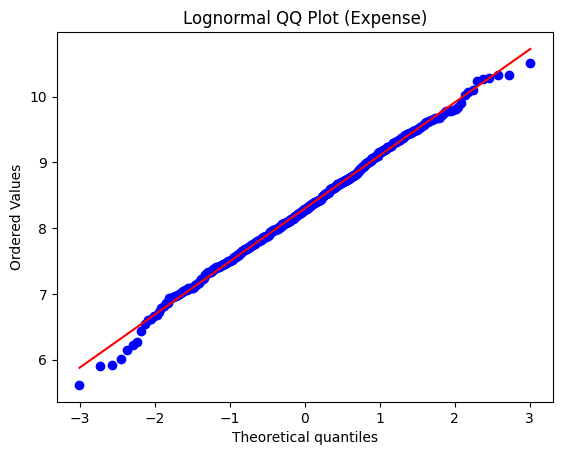

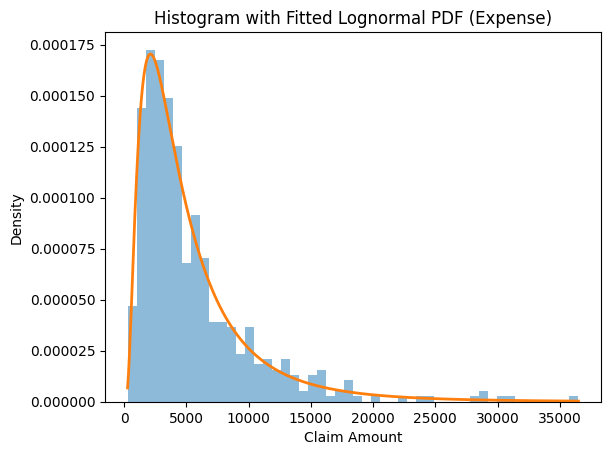

C:\Users\graha\AppData\Local\Temp\ipykernel_21996\3405524212.py:46: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


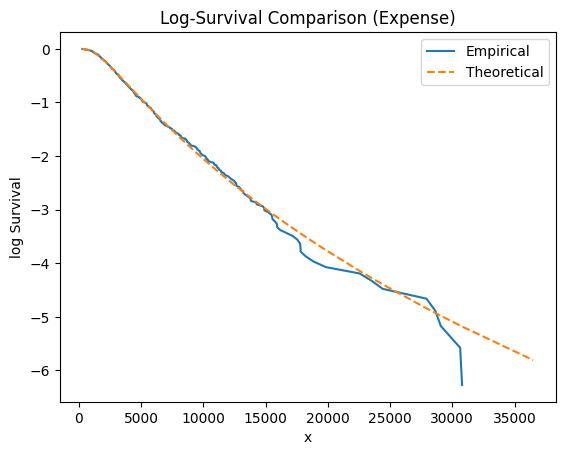

KS statistic: 0.018643939466284398
p-value: 0.9914187403159496
AndersonResult(statistic=0.22611609085220152, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.300180851162567, scale=0.803489159355999)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.052715654952076675
Severity: 5554.517874422641
Expected Loss: 292.81004769320634

===== Medical =====
Estimated μ = 9.215139377955834
Estimated σ = 1.0674525243823327


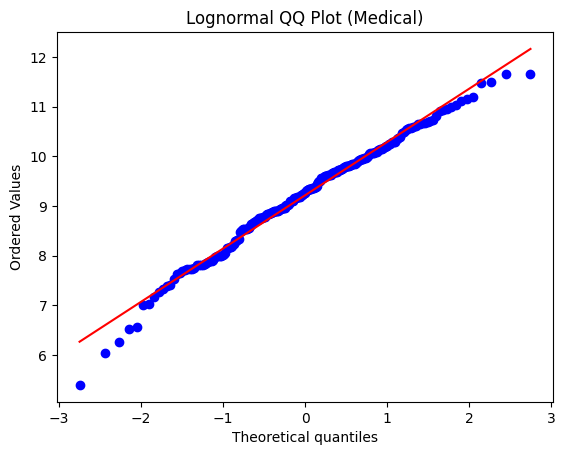

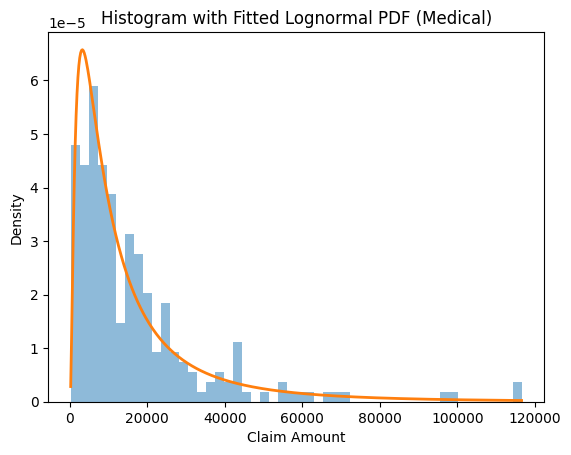

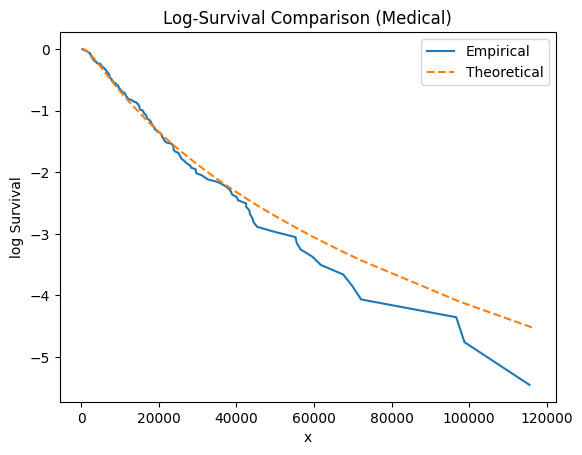

KS statistic: 0.0506124945593448
p-value: 0.571697381659167
AndersonResult(statistic=0.6612576811390056, critical_values=array([0.567, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.215139377955834, scale=1.0697505949095782)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.023290683726509397
Severity: 17762.89169329852
Expected Loss: 413.70989249685675

===== Liability =====
Estimated μ = 8.609942180944467
Estimated σ = 1.1022761302870765


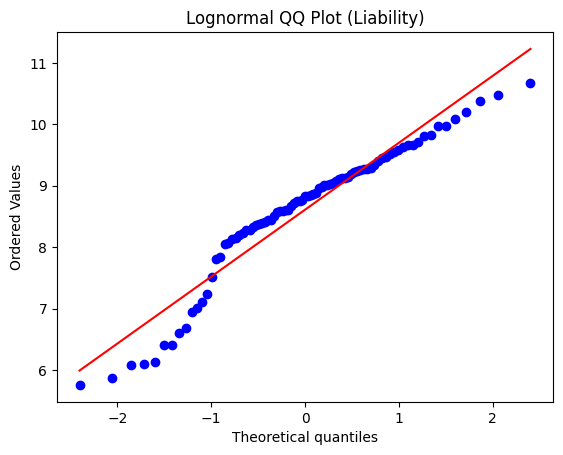

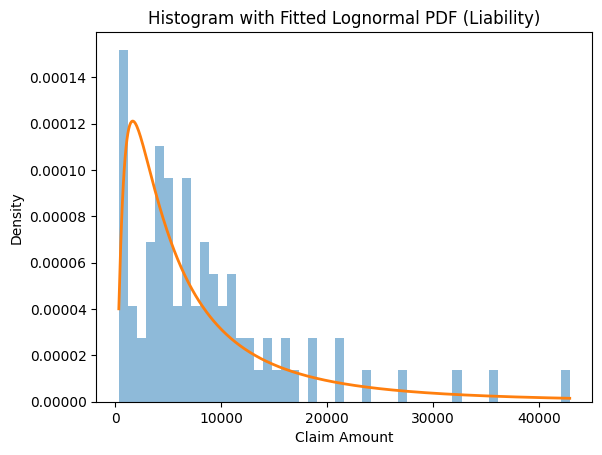

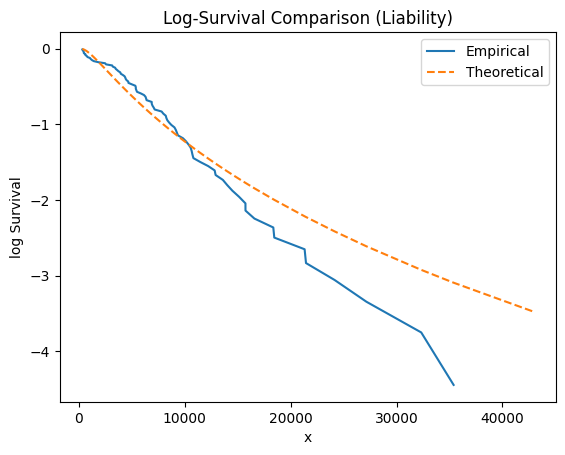

KS statistic: 0.1219993750550172
p-value: 0.14648510191412178
AndersonResult(statistic=2.090537301652631, critical_values=array([0.552, 0.629, 0.754, 0.88 , 1.046]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.609942180944467, scale=1.108817885821349)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.0085
Severity: 10071.334654785342
Expected Loss: 85.60634456567541

===== Property =====
Estimated μ = 6.641797486833636
Estimated σ = 0.7829269600202935


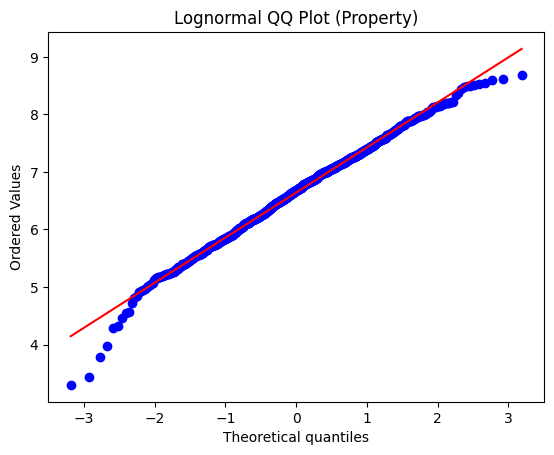

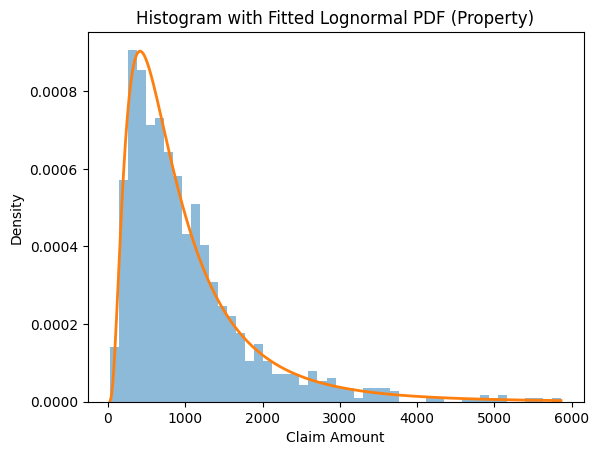

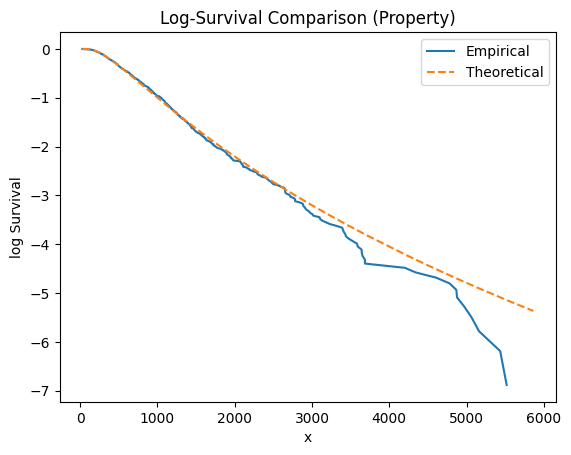

KS statistic: 0.028167806999828904
p-value: 0.4152910790376526
AndersonResult(statistic=0.6544304076859362, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.641797486833636, scale=0.7833295966938718)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.0968062879315491
Severity: 1041.3620504802013
Expected Loss: 100.81039449977474


In [140]:
datasets = {
    'Expense': dat_expense,
    'Medical': dat_medical,
    'Liability': dat_liability,
    'Property': dat_property
}

results = {}

for name, dat in datasets.items():
    print(f"\n===== {name} =====")

    # Extract positive claim amounts
    vals = dat.loc[dat['amount'] > 0, 'amount']
    
    # Take logs
    log_vals = np.log(vals)
    
    # Fit lognormal (shape=sigma, loc=0, scale=exp(mu))
    sigma, loc, scale = st.lognorm.fit(vals, floc=0)
    mu = np.log(scale)
    
    print("Estimated μ =", mu)
    print("Estimated σ =", sigma)
    
    # QQ plot
    st.probplot(log_vals, dist="norm", plot=plt)
    plt.title(f"Lognormal QQ Plot ({name})")
    plt.show()
    
    # Histogram with fitted PDF
    count, bins, _ = plt.hist(vals, bins=50, density=True, alpha=0.5)
    x = np.linspace(vals.min(), vals.max(), 500)
    pdf = st.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    plt.plot(x, pdf, linewidth=2)
    plt.xlabel("Claim Amount")
    plt.ylabel("Density")
    plt.title(f"Histogram with Fitted Lognormal PDF ({name})")
    plt.show()
    
    # Empirical vs theoretical survival
    sorted_vals = np.sort(vals)
    ecdf = np.arange(1, len(vals)+1) / len(vals)
    surv_emp = 1 - ecdf
    surv_theo = st.lognorm.sf(sorted_vals, s=sigma, scale=np.exp(mu))
    plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")
    plt.plot(sorted_vals, np.log(surv_theo), label="Theoretical", linestyle="--")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("log Survival")
    plt.title(f"Log-Survival Comparison ({name})")
    plt.show()
    
    # KS test
    ks_stat, p_value = st.kstest(vals, 'lognorm', args=(sigma, 0, np.exp(mu)))
    print("KS statistic:", ks_stat)
    print("p-value:", p_value)
    
    # Anderson-Darling test on log-values
    ad_result = st.anderson(log_vals, dist='norm')
    print(ad_result)
    
    # Expected loss
    P_claim = dat['has_claim'].sum() / len(dat['has_claim'])
    severity = np.exp(mu + 0.5 * sigma**2)
    expected_loss = P_claim * severity
    
    print("Frequency:", P_claim)
    print("Severity:", severity)
    print("Expected Loss:", expected_loss)
    
    # Save results
    results[name] = {
        'mu': mu,
        'sigma': sigma,
        'frequency': P_claim,
        'severity': severity,
        'expected_loss': expected_loss
    }

# Prove that number of claims for a type of insurance follows a Poisson distribution


=== Expense: has_claim ===
Estimated p: 0.0527
Observed variance: 0.0499, Expected variance: 0.0499
Chi-square statistic: 0.0000, p-value: 1.0000


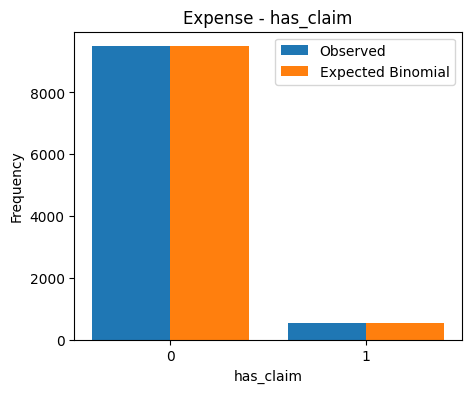


=== Property: has_claim ===
Estimated p: 0.0968
Observed variance: 0.0874, Expected variance: 0.0874
Chi-square statistic: 0.0000, p-value: 1.0000


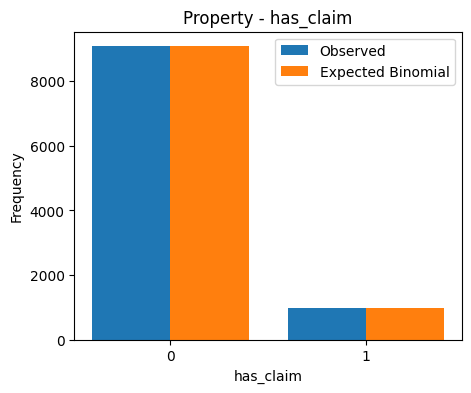


=== Medical: has_claim ===
Estimated p: 0.0233
Observed variance: 0.0228, Expected variance: 0.0227
Chi-square statistic: 0.0000, p-value: 1.0000


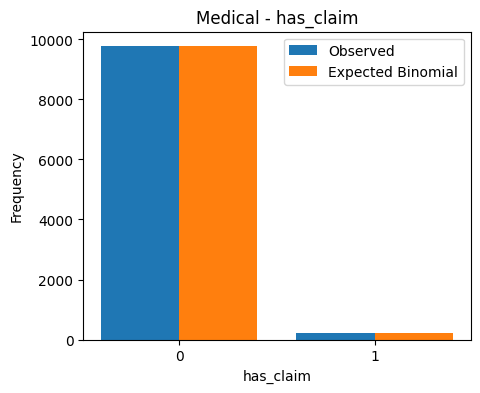


=== Liability: has_claim ===
Estimated p: 0.0085
Observed variance: 0.0084, Expected variance: 0.0084
Chi-square statistic: 0.0000, p-value: 1.0000


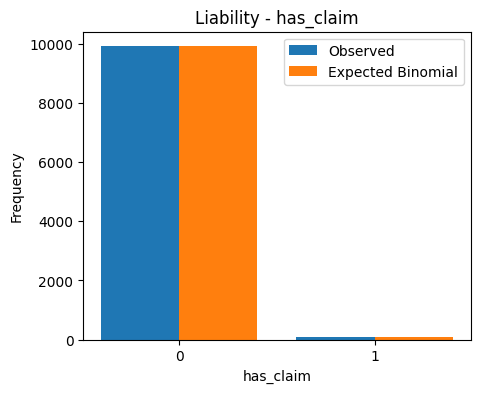

In [141]:
def check_binomial_fit(df, col_name, n=1, dataset_name="Dataset"):
    """
    Checks if a column follows a Binomial distribution.
    
    Parameters:
    - df: pandas DataFrame
    - col_name: column name to check
    - n: number of trials (default 1 for Bernoulli)
    - dataset_name: string for labeling plots
    """
    
    # 1. Estimate p
    p_hat = df[col_name].mean()
    
    # 2. Observed counts
    counts = df[col_name].value_counts().sort_index()
    
    # 3. Expected counts
    expected_counts = [binom.pmf(k, n, p_hat) * len(df) for k in counts.index]
    
    # 4. Variance check
    var_observed = df[col_name].var()
    var_expected = n * p_hat * (1 - p_hat)
    
    print(f"\n=== {dataset_name}: {col_name} ===")
    print(f"Estimated p: {p_hat:.4f}")
    print(f"Observed variance: {var_observed:.4f}, Expected variance: {var_expected:.4f}")
    
    # 5. Chi-square goodness-of-fit
    chi2_stat, p_val = chisquare(f_obs=counts, f_exp=expected_counts)
    print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")
    
    # 6. Plot observed vs expected
    plt.figure(figsize=(5,4))
    plt.bar(counts.index - 0.2, counts, width=0.4, label="Observed")
    plt.bar(counts.index + 0.2, expected_counts, width=0.4, label="Expected Binomial")
    plt.xticks(counts.index)
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title(f"{dataset_name} - {col_name}")
    plt.legend()
    plt.show()
    

# Example usage for all 4 datasets
datasets = {
    "Expense": dat_expense,
    "Property": dat_property,
    "Medical": dat_medical,
    "Liability": dat_liability
}

for name, df in datasets.items():
    check_binomial_fit(df, col_name="has_claim", n=1, dataset_name=name)

# Deriving Probable Maximum Loss (PML)

In [142]:
# Simulation parameters
N_sim = 100_000  # number of Monte Carlo simulations
PML_percentiles = [95, 99, 99.5]

# Initialize storage for simulated losses
simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
simulated_losses['Total'] = np.zeros(N_sim)

# Run Monte Carlo for each line
for line, params in results.items():
    n_exposures = len(eval(f"dat_{line.lower()}"))  # assumes dat_expense, dat_medical, etc.
    p_claim = params['frequency']
    mu = params['mu']
    sigma = params['sigma']
    
    for i in range(N_sim):
        n_claims = np.random.binomial(n_exposures, p_claim)
        if n_claims > 0:
            severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
            simulated_losses[line][i] = severities.sum()
        else:
            simulated_losses[line][i] = 0
        
        # Add to total portfolio
        simulated_losses['Total'][i] += simulated_losses[line][i]

# Compute PMLs
PML_results = {}
for line, losses in simulated_losses.items():
    PML_results[line] = {f'PML_{p}': np.percentile(losses, p) for p in PML_percentiles}

# Print results
for line, pmls in PML_results.items():
    print(f"\n{line} PMLs:")
    for perc, value in pmls.items():
        print(f"{perc}: {value:,.2f}")
#The probability that the loss exceeds this value(generated one) is equal given p(tested 95% 99% 99.5%)

TypeError: 'list' object is not callable

In [ ]:
def simulate_portfolio_pml_tvar(results, datasets, N_sim=100_000, PML_percentiles=[95, 99, 99.5]):
    """
    Simulate portfolio losses using compound binomial-lognormal approach,
    and compute PML and TVaR at specified percentiles.
    
    Parameters:
        results: dict containing 'mu', 'sigma', 'frequency' for each line
        datasets: dict of dataframes for each line (to get number of exposures)
        N_sim: number of Monte Carlo simulations
        PML_percentiles: list of percentiles to compute PML and TVaR
    
    Returns:
        Dictionary of PML and TVaR for each line and total portfolio
    """
    
    # Initialize storage
    simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
    simulated_losses['Total'] = np.zeros(N_sim)
    
    # Monte Carlo simulation
    for line, params in results.items():
        n_exposures = len(datasets[line])
        p_claim = params['frequency']
        mu = params['mu']
        sigma = params['sigma']
        
        for i in range(N_sim):
            n_claims = np.random.binomial(n_exposures, p_claim)
            if n_claims > 0:
                severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
                simulated_losses[line][i] = severities.sum()
            else:
                simulated_losses[line][i] = 0
            simulated_losses['Total'][i] += simulated_losses[line][i]
    
    # Compute PML and TVaR
    results_metrics = {}
    for line, losses in simulated_losses.items():
        results_metrics[line] = {}
        for p in PML_percentiles:
            PML_val = np.percentile(losses, p)
            TVaR_val = losses[losses >= PML_val].mean()
            results_metrics[line][f'PML_{p}'] = PML_val
            results_metrics[line][f'TVaR_{p}'] = TVaR_val
    
    return results_metrics

In [ ]:
datasets = {
    'Expense': dat_expense,
    'Medical': dat_medical,
    'Liability': dat_liability,
    'Property': dat_property
}

metrics = simulate_portfolio_pml_tvar(results, datasets)

# Print nicely
for line, vals in metrics.items():
    print(f"\n{line}:")
    for k, v in vals.items():
        print(f"{k}: {v:,.2f}")


In [ ]:
def plot_portfolio_loss_distribution(simulated_losses, PML_percentiles=[95, 99, 99.5]):
    """
    Plots the histogram of total portfolio losses with PML and TVaR percentiles marked.
    
    Parameters:
        simulated_losses: dict containing simulated losses for each line and 'Total'
        PML_percentiles: list of percentiles to mark
    """
    
    total_losses = simulated_losses['Total']
    
    plt.figure(figsize=(12,6))
    
    # Histogram
    plt.hist(total_losses, bins=200, density=True, alpha=0.5, color='skyblue')
    
    # Compute and mark PML and TVaR
    for p in PML_percentiles:
        PML_val = np.percentile(total_losses, p)
        TVaR_val = total_losses[total_losses >= PML_val].mean()
        
        plt.axvline(PML_val, color='red', linestyle='--', linewidth=2, label=f'PML {p}%: {PML_val:,.0f}')
        plt.axvline(TVaR_val, color='green', linestyle='-.', linewidth=2, label=f'TVaR {p}%: {TVaR_val:,.0f}')
    
    plt.xlabel("Total Portfolio Loss")
    plt.ylabel("Density")
    plt.title("Total Portfolio Loss Distribution with PML and TVaR")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_portfolio_loss_distribution(simulated_losses)

# Simulation for higher frequency during storm season in Florida

In [ ]:
def simulate_portfolio_pml_tvar_seasonality(results, datasets, N_sim=100_000, PML_percentiles=[95, 99, 99.5]):
    """
    Simulate portfolio losses using compound binomial-lognormal approach with seasonality,
    and compute PML and TVaR at specified percentiles.
    
    Parameters:
        results: dict containing 'mu', 'sigma', 'frequency' for each line
        datasets: dict of dataframes for each line (to get number of exposures)
        N_sim: number of Monte Carlo simulations
        PML_percentiles: list of percentiles to compute PML and TVaR
    
    Returns:
        Dictionary of PML and TVaR for each line and total portfolio
    """
    
    # Define seasonality fractions for Florida hurricane season (June–Nov)
    season_fractions = [0.05, 0.10, 0.25, 0.35, 0.20, 0.05]  # June→Nov
    
    # Initialize storage
    simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
    simulated_losses['Total'] = np.zeros(N_sim)
    
    # Monte Carlo simulation with seasonality
    for line, params in results.items():
        n_exposures = len(datasets[line])
        p_claim = params['frequency']
        mu = params['mu']
        sigma = params['sigma']
        
        for i in range(N_sim):
            annual_loss = 0
            for f in season_fractions:
                n_claims = np.random.binomial(n_exposures, p_claim * f)
                if n_claims > 0:
                    severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
                    annual_loss += severities.sum()
            simulated_losses[line][i] = annual_loss
            simulated_losses['Total'][i] += annual_loss
    
    # Compute PML and TVaR
    results_metrics = {}
    for line, losses in simulated_losses.items():
        results_metrics[line] = {}
        for p in PML_percentiles:
            PML_val = np.percentile(losses, p)
            TVaR_val = losses[losses >= PML_val].mean()
            results_metrics[line][f'PML_{p}'] = PML_val
            results_metrics[line][f'TVaR_{p}'] = TVaR_val
    
    return results_metrics, simulated_losses

In [ ]:
seasonal_metrics, seasonal_losses = simulate_portfolio_pml_tvar_seasonality(results, datasets)

# Print nicely
for line, vals in seasonal_metrics.items():
    print(f"\n{line} (Seasonality-adjusted):")
    for k, v in vals.items():
        print(f"{k}: {v:,.2f}")


In [ ]:
# --- 1. Numerical comparison table ---
def compare_pml_tvar(original_metrics, seasonal_metrics, PML_percentiles=[95, 99, 99.5]):
    lines = original_metrics.keys()
    
    for line in lines:
        print(f"\n=== {line} Comparison ===")
        for p in PML_percentiles:
            orig_pml = original_metrics[line][f'PML_{p}']
            seasonal_pml = seasonal_metrics[line][f'PML_{p}']
            pml_diff = seasonal_pml - orig_pml
            pml_pct = pml_diff / orig_pml * 100
            
            orig_tvar = original_metrics[line][f'TVaR_{p}']
            seasonal_tvar = seasonal_metrics[line][f'TVaR_{p}']
            tvar_diff = seasonal_tvar - orig_tvar
            tvar_pct = tvar_diff / orig_tvar * 100
            
            print(f"PML_{p}: Original = {orig_pml:,.0f}, Seasonality = {seasonal_pml:,.0f}, Change = {pml_pct:.2f}%")
            print(f"TVaR_{p}: Original = {orig_tvar:,.0f}, Seasonality = {seasonal_tvar:,.0f}, Change = {tvar_pct:.2f}%")
            
# Run the comparison
compare_pml_tvar(metrics, seasonal_metrics)

# --- 2. Overlay histogram of total portfolio losses ---
def plot_total_loss_comparison(original_losses, seasonal_losses, bins=200):
    plt.figure(figsize=(12,6))
    
    plt.hist(original_losses['Total'], bins=bins, alpha=0.5, label='Original', color='skyblue', density=True)
    plt.hist(seasonal_losses['Total'], bins=bins, alpha=0.5, label='Seasonality-adjusted', color='orange', density=True)
    
    plt.xlabel("Total Portfolio Loss")
    plt.ylabel("Density")
    plt.title("Total Portfolio Loss Distribution: Original vs Seasonality-adjusted")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_total_loss_comparison(simulated_losses, seasonal_losses)